WIP

In [1]:
import folium
import matplotlib.pyplot as plt
from sourcing_data import TramData, OpenStreetMapData

2025-03-02 20:40:56,791 - INFO - Logging initialized.


In [ ]:
tram_data = TramData()
osm_data = OpenStreetMapData()

### Visualisations of the trams routes

In [3]:
LINE = 18 #Select line

coordinates = list(tram_data.lines_df[tram_data.lines_df.index == LINE]['coordinates'])[0]
map_obj = folium.Map(location=[coordinates[0][0], coordinates[0][1]], zoom_start=13)

for point in coordinates:
    stop_name = [
        stop for stop, metadata in tram_data.stops_data.items()
        if metadata['latitude'] == point[0] and metadata['longitude'] == point[1]
    ][0]
    folium.Marker(
        location=[point[0], point[1]],
        popup=f"{stop_name}",
        icon=folium.Icon(color="blue")
    ).add_to(map_obj)

coordinates_line = [[point[0], point[1]] for point in coordinates]
folium.PolyLine(coordinates_line, color="blue", weight=2.5, opacity=1).add_to(map_obj)
map_obj


In [4]:
tram_data.stops_df

,category,latitude,longitude,number_of_lines,lines,min_time_between_trams,max_time_between_trams,avg_time_between_trams
stop,,,,,,,,
Koksochemia (nż),tram,50.072217,20.104420,2,"[10, 21]",-58.0,1322.0,572.000000
Pleszów,tram,50.073025,20.117432,2,"[10, 21]",-118.0,662.0,272.000000
Lubicz,tram,50.065631,19.951822,6,"[2, 4, 10, 14, 20, 52]",-298.0,1442.0,563.818182
Czerwone Maki P+R,tram,50.018344,19.889423,4,"[11, 17, 18, 52]",-238.0,1082.0,402.000000
Chmieleniec,tram,50.021027,19.897951,4,"[11, 17, 18, 52]",-298.0,1142.0,454.307692
...,...,...,...,...,...,...,...,...
Mrozowa,tram,50.084566,20.071970,0,[],NaN,NaN,NaN
Blokowa,tram,50.085745,20.074574,0,[],NaN,NaN,NaN
Os. Piastów,tram,50.102382,20.012230,2,"[21, 52]",-241.0,959.0,459.000000


### Visualisations of the city streets & buildings

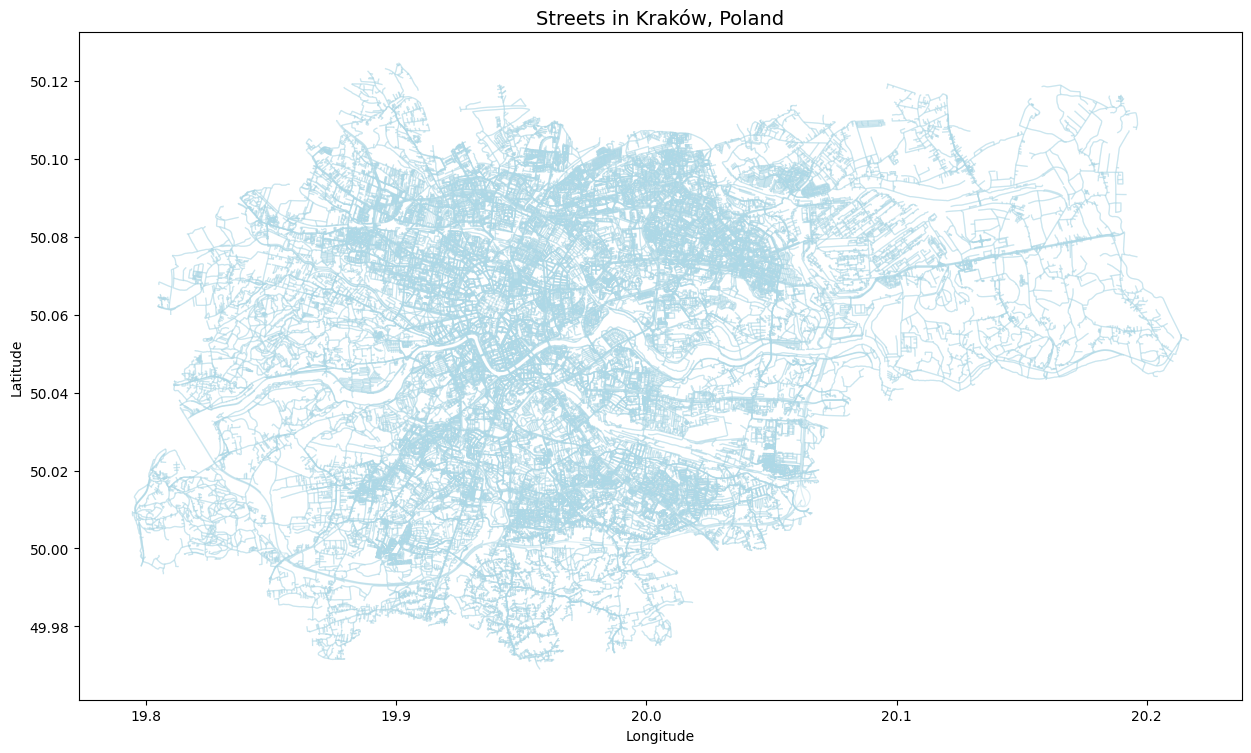

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))

if not osm_data.streets_df.empty:
    osm_data.streets_df.plot(ax=ax, color="lightblue", linewidth=0.9, alpha=0.4, label="Streets")

ax.set_title(f"Streets in {osm_data.place}", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

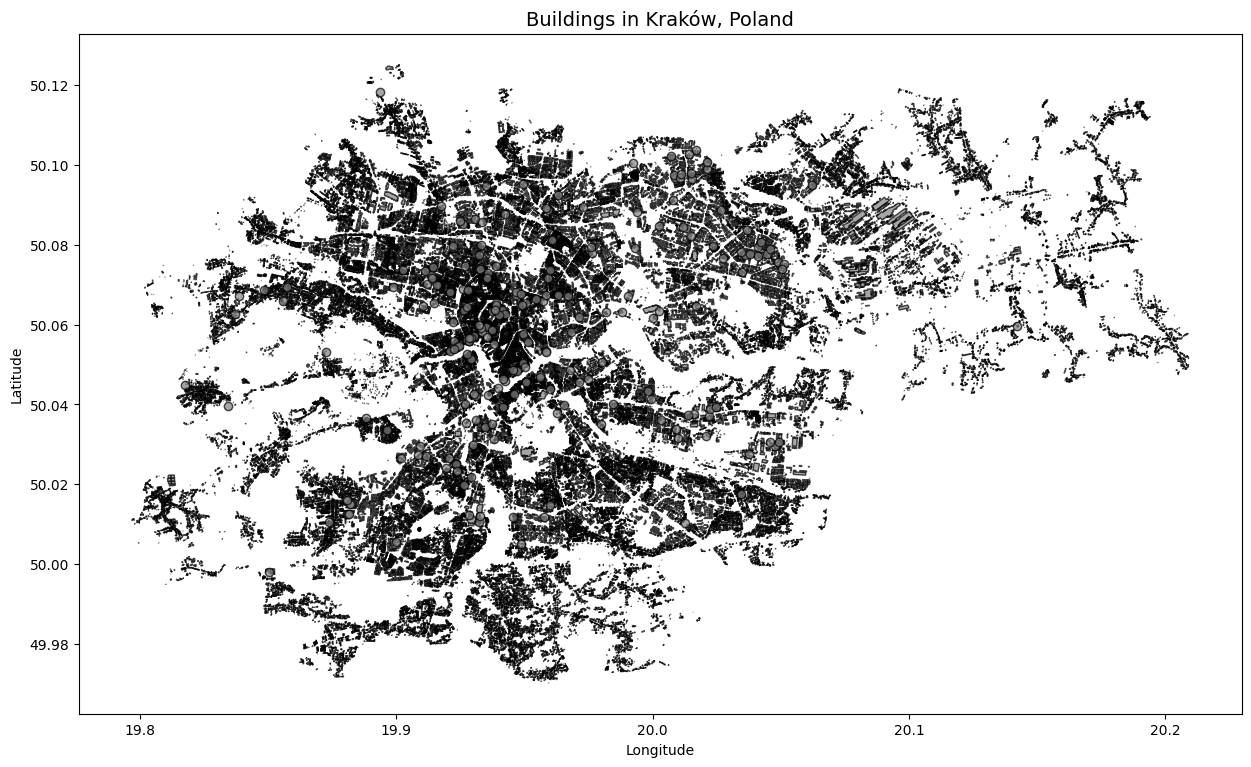

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))

if not osm_data.buildings_df.empty:
    osm_data.buildings_df.plot(ax=ax, color="gray", edgecolor="black", alpha=0.7, label="Buildings")

ax.set_title(f"Buildings in {osm_data.place}", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### New line optimization
